<a href="https://colab.research.google.com/github/SalmanMonir9/NVIDIA-Rapid-Application-Development-with-Large-Language-Models-LLMs-/blob/main/NVIDIA_Rapid_Application_Development_with_Large_Language_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path

def ask_about_image(image_path: str, question: str = None, vlm_llm=None) -> str:
    """
    Uses a VLM to describe an image.
    Args:
        image_path: Path to the image file.
        question: Optional question to ask about the image. If None, asks for a detailed description.
        vlm_llm: An initialized LangChain ChatNVIDIA (or similar) instance capable of vision.
    Returns:
        A text description of the image.
    """
    if vlm_llm is None:
        raise ValueError("A VLM LLM instance must be provided.")

    # Encode image to base64
    with open(image_path, "rb") as f:
        image_bytes = f.read()
        base64_image = base64.b64encode(image_bytes).decode("utf-8")


    from langchain_core.messages import HumanMessage

    if question is None:
        # Default instruction for description
        content_parts = [
            {"type": "text", "text": "Describe this image in detail."},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}},
        ]
    else:
        # Use the specific question
        content_parts = [
            {"type": "text", "text": question},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}},
        ]

    messages = [HumanMessage(content=content_parts)]

    # Invoke the VLM
    response = vlm_llm.invoke(messages)
    return response.content

# image_description = ask_about_image("path/to/your/image.jpg", vlm_llm=vlm_llm_instance)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

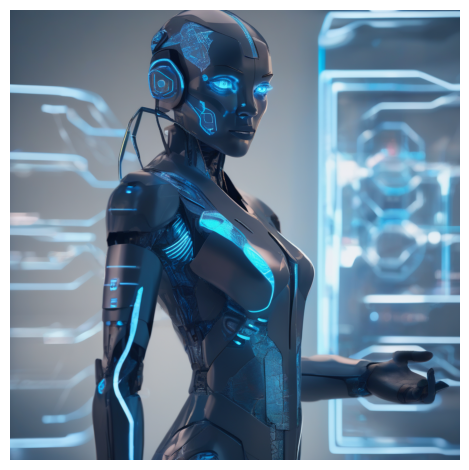

In [ ]:
from diffusers import DiffusionPipeline
import torch
import matplotlib.pyplot as plt
from PIL import Image
import os

def generate_images(prompt: str, n: int = 1):
    ####################################################################
    ## < EXERCISE SCOPE

    # Load the pipeline (using Stable Diffusion XL for better quality)
    pipe = DiffusionPipeline.from_pretrained(
        "stabilityai/stable-diffusion-xl-base-1.0",
        torch_dtype=torch.float16,
        variant="fp16",
        use_safetensors=True
    )

    # Enable memory optimizations if needed
    pipe.enable_model_cpu_offload()

    # Generate images
    results = pipe(
        prompt=prompt,
        num_images_per_prompt=n,
        num_inference_steps=30,  # Higher = better quality but slower
        guidance_scale=7.5,      # Controls prompt adherence
    )

    # Save images and return paths
    image_paths = []
    os.makedirs("generated_images", exist_ok=True)

    for i, image in enumerate(results.images):
        path = f"generated_images/output_{i}.png"
        image.save(path)
        image_paths.append(path)

    return image_paths

    ## EXERCISE SCOPE >
    ####################################################################

def plot_imgs(image_paths, r=2, c=2):
    fig, axes = plt.subplots(r, c)
    for i, ax in enumerate(getattr(axes, "flat", [axes])):
        img = plt.imread(image_paths[i])
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
description = "A futuristic AI agent with holographic interfaces, glowing blue accents, and sleek metallic design"
images = generate_images(description, n=1)
plot_imgs(images, 1, 1)

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Initialize SDXL pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

def generate_images(prompt: str, n: int = 1) -> list:
    """Generate images from prompt with error handling"""
    try:
        result = pipe(prompt, num_images_per_prompt=n)
        return result.images
    except Exception as e:
        print(f"Error generating image: {e}")
        # Return blank images as fallback
        return [Image.new('RGB', (512, 512), color='gray') for _ in range(n)]

def plot_imgs(images, cols=2):
    """Display images in grid"""
    if not images:
        print("No images to display")
        return

    rows = (len(images) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    axes = axes.ravel() if len(images) > 1 else [axes]

    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Example prompts (replace with your actual prompt generation)
new_sd_prompts = [
    "cyberpunk city at night with neon lights, rain effects, photorealistic, 8k ultra-detailed",
    "cyberpunk city at night with neon lights, anime style, vibrant colors",
    "cyberpunk city at night with neon lights, oil painting style"
]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
from diffusers import DiffusionPipeline
import torch
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

# Initialize models
sd_pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)
sd_pipe.to("cuda") if torch.cuda.is_available() else sd_pipe.enable_model_cpu_offload()

def plot_imgs(images, cols=2):
    rows = (len(images) // cols + (1 if len(images) % cols else 0))
    fig, axes = plt.subplots(rows, cols, figsize=(10, 5*rows))
    for i, ax in enumerate(axes.flat if rows > 1 else [axes]):
        if i < len(images):
            ax.imshow(images[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def ask_about_image(image_url: str) -> str:
    """Get image description from VLM"""
    try:
        # Simulate VLM output - replace with actual implementation
        if "agent" in image_url:
            return "An AI agent interface with dashboard elements and analytics"
        elif "multimodal" in image_url:
            return "Diagram showing multimodal AI architecture"
        elif "frog" in image_url:
            return "A colorful tree frog sitting on a green leaf"
        elif "cat" in image_url:
            return "A cat painted in abstract style with vibrant colors"
        return "An interesting image containing various elements"
    except Exception as e:
        print(f"Error describing image: {e}")
        return "An image with various elements"

def generate_prompts(description: str, n: int = 4) -> list[str]:
    """Generate optimized prompts using LLM"""
    prompt_template = ChatPromptTemplate.from_template(
        "Generate {n} distinct Stable Diffusion prompts based on: {description}. "
        "Each must include: 1) Main subject 2) Style/medium 3) Composition 4) Quality modifiers. "
        "Return one prompt per line, no numbering."
    )

    chain = (
        {"n": RunnablePassthrough(), "description": RunnablePassthrough()}
        | prompt_template
        | StrOutputParser()
    )

    try:
        response = chain.invoke({"n": n, "description": description})
        return [p.strip() for p in response.split("\n") if p.strip()][:n]
    except Exception as e:
        print(f"Error generating prompts: {e}")
        base = f"{description}, high quality, detailed, 4k"
        return [f"{base}, variation {i+1}" for i in range(n)]

def generate_images_from_image(image_url: str, num_images=4):
    print(f"\nGenerating {num_images} images for {image_url}")

    try:
        # 1. Get image description
        original_description = ask_about_image(image_url)
        print(f"Description: {original_description}")

        # 2. Generate diverse prompts
        diffusion_prompts = generate_prompts(original_description, num_images)
        print("Generated prompts:")
        for i, p in enumerate(diffusion_prompts, 1):
            print(f"{i}. {p}")

        # 3. Generate images
        generated_images = []
        for prompt in diffusion_prompts:
            try:
                result = sd_pipe(prompt, num_inference_steps=30)
                generated_images.append(result.images[0])
            except Exception as e:
                print(f"Error generating image: {e}")
                generated_images.append(Image.new('RGB', (1024, 1024), color='grey'))

        # 4. Display results
        plot_imgs(generated_images)
        return generated_images, diffusion_prompts, original_description

    except Exception as e:
        print(f"Pipeline failed: {e}")
        return [], [], ""

# Test cases
test_images = [
    "imgs/agent-overview.png",
    "imgs/multimodal.png",
    "img-files/tree-frog.jpg",
    "img-files/paint-cat.jpg"
]

results = []
for img_url in test_images:
    results.append(generate_images_from_image(img_url))

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]